In [2]:
import pandas as pd
import numpy as np
import tabula
import camelot
import pdfminer
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
try:
    from cStringIO import StringIO
except ImportError:
    from io import StringIO 
import matplotlib.pyplot as plt

In [8]:
f = "axis03.pdf"

tables = tabula.read_pdf(f,
                      pages=[15],
                      silent=True,
                      multiple_tables=True,
                      pandas_options={'header':None})
df = pd.DataFrame()
df = pd.concat([c for c in tables]).drop_duplicates()

In [9]:
df.to_csv("xnx15.csv", index=0)

In [107]:
tables = camelot.read_pdf("axis03.pdf",flavor="stream",pages="all")
tables

<TableList n=19>

In [108]:
df = pd.DataFrame(); tm = pd.DataFrame();

In [109]:
# tables[7].df

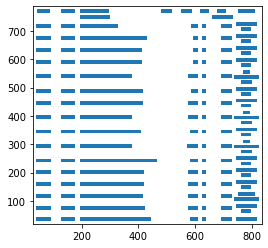

In [110]:
camelot.plot(tables[7], kind='text')
plt.show()

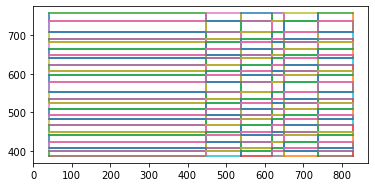

In [111]:
camelot.plot(tables[5], kind='grid')
plt.show()

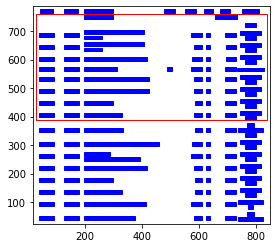

In [74]:
camelot.plot(tables[5], kind='contour')
plt.show()

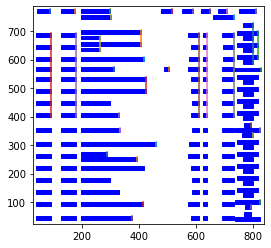

In [76]:
camelot.plot(tables[5], kind='textedge')
plt.show()

In [ ]:
for i in range(len(tables)) :
        tmp=tables[i].df

In [20]:
tables[5].parsing_report

{'accuracy': 100.0, 'whitespace': 52.78, 'order': 1, 'page': 10}

In [43]:
# from pdf_table_extractor.pdf_table_extractor import extract_table_data

In [84]:
tables=camelot.read_pdf("axis03.pdf",flavor='stream' ,pages = "all",edge_tol=500)            
if len(tables) !=0 :
    df=pd.DataFrame();    tmp=pd.DataFrame(); 
    for i in range(len(tables)) :
        tmp=tables[i].df  
        df=pd.concat([df,tmp]).drop_duplicates(keep='first').reset_index(drop=True)

In [85]:
df.to_csv("err.csv",index=0)

In [86]:
tmp=tables[2].df
tmp

,0,1,2,3,4,5
0,Tran Date\nValue Date\nTransaction Particulars,Chq No.,Amount,DR|CR,Balance,Branch Name
1,OPENING BALANCE :,,,,25184.55,
2,,,,,,ATM
3,14-01-2019\n14-01-2019\nEDC/00053-00053-/M0370...,,1001.90,CR,49324.09,RECONCILATION
4,,,,,,CENTRE
5,,,,,,ZAMROODPUR
6,14-01-2019\n14-01-2019\nIMPS/P2A/901412924696/...,,497.00,CR,49821.09,
7,,,,,,DEL DL
8,,,,,,ZAMROODPUR
9,14-01-2019\n14-01-2019\nIMPS/P2A/901412927199/...,,400.00,CR,50221.09,


In [87]:
tmp.columns.values

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [88]:
idx=[ c for c in tmp[tmp.apply(lambda row: row.astype(str).str.lower().str.contains('balance').any(), axis=1) ==True].index if c in tmp[tmp.apply(lambda row: row.astype(str).str.lower().str.contains('date').any(), axis=1) ==True].index ][0]
tmp.columns=tmp.iloc[idx] ; tmp=tmp.iloc[idx+1:,:] ; tmp.reset_index(drop=True,inplace=True) 
print("Columns:",tmp.columns)

Columns: Index(['Tran Date\nValue Date\nTransaction Particulars', 'Chq No.', 'Amount',
       'DR|CR', 'Balance', 'Branch Name'],
      dtype='object', name=0)


In [89]:
tmp=tmp[~tmp.index.isin(tmp[tmp.apply(lambda row: row.astype(str).str.lower().str.contains('page:|account status|total|reason for return|inward clg|opening balance|statement of a/c').any(), axis=1) ==True].index)]
tmp=pd.DataFrame(tmp.T.drop_duplicates().T)
tmp.drop(tmp.nunique(dropna=False)[(tmp.nunique(dropna=False) == 1)].index, axis=1,inplace=True)

In [90]:
tmp.columns = ["A","B","C","D","E"]

In [91]:
tmp.head()

,A,B,C,D,E
1,,,,,ATM
2,14-01-2019\n14-01-2019\nEDC/00053-00053-/M0370...,1001.90,CR,49324.09,RECONCILATION
3,,,,,CENTRE
4,,,,,ZAMROODPUR
5,14-01-2019\n14-01-2019\nIMPS/P2A/901412924696/...,497.00,CR,49821.09,


In [92]:
tmp.A

1                                                      
2     14-01-2019\n14-01-2019\nEDC/00053-00053-/M0370...
3                                                      
4                                                      
5     14-01-2019\n14-01-2019\nIMPS/P2A/901412924696/...
6                                                      
7                                                      
8     14-01-2019\n14-01-2019\nIMPS/P2A/901412927199/...
9                                                      
10                                                     
11    14-01-2019\n14-01-2019\nIMPS/P2A/901412321960/...
12                                                     
13                                                     
14    15-01-2019\n15-01-2019\nECOM PUR/PAYTM/Noida/1...
15                                                     
16                                     BY CASH DEPOSIT-
17                               17-01-2019\n17-01-2019
18                   BNA/DPRH329801/6971/170119/

In [82]:
tmp1 = pd.DataFrame(tmp.A.str.split('\n',1).tolist(),columns = ['Q1','Q2'])

In [83]:
tmp1

,Q1,Q2
0,,None
1,14-01-2019,14-01-2019\nEDC/00053-00053-/M037011032984700
2,,None
3,,None
4,14-01-2019,14-01-2019\nIMPS/P2A/901412924696/919971624523...
5,,None
6,,None
7,14-01-2019,14-01-2019\nIMPS/P2A/901412927199/919971624523...
8,,None
9,,None


In [96]:
tmp2 = pd.DataFrame(tmp.A.str.split('\n',2).tolist(),columns = ['Z1','Z2','Z3'])

In [97]:
tmp2

,Z1,Z2,Z3
0,,None,None
1,14-01-2019,14-01-2019,EDC/00053-00053-/M037011032984700
2,,None,None
3,,None,None
4,14-01-2019,14-01-2019,IMPS/P2A/901412924696/919971624523/INETIMPS00073
5,,None,None
6,,None,None
7,14-01-2019,14-01-2019,IMPS/P2A/901412927199/919971624523/MOBUA01304940
8,,None,None
9,,None,None


In [56]:
tmp.to_csv("tmp.csv", index=0)

In [19]:
if tmp[0][0] == 'Tran Date\nValue Date\nTransaction Particulars':
    print(" ")

In [41]:
tmp=tables[2].df

In [42]:
tmp.to_csv("err_01.csv",index=0)